In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

In [3]:
iris = datasets.load_iris()

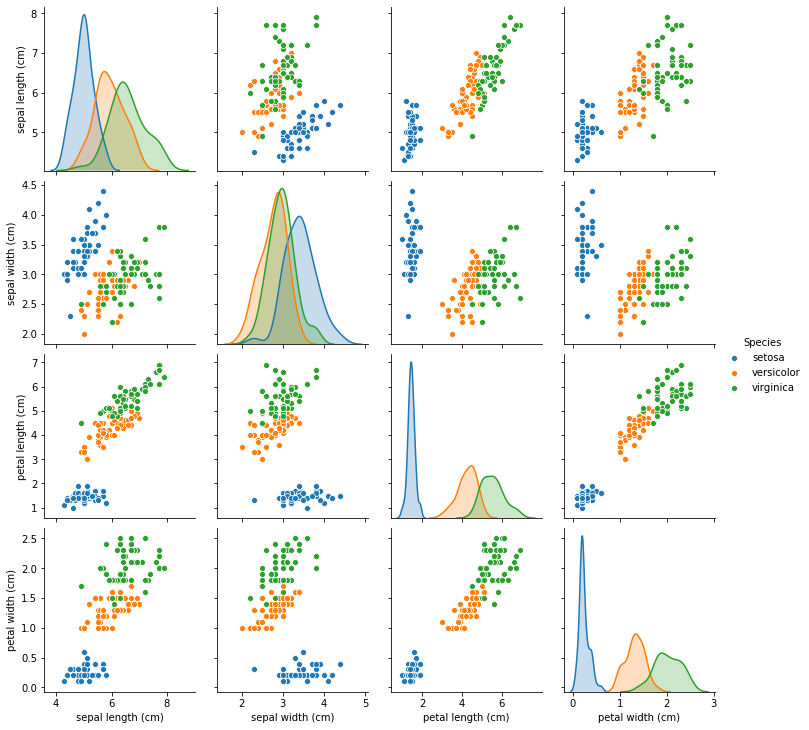

In [6]:
###Create pairplot
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Species'] = np.array([iris.target_names[cls] for cls in iris.target])
sns.pairplot(iris_df, hue='Species')

In [8]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target,
                                                    random_state=42)

model = forest.fit(X_train, y_train)

In [10]:
predictions = model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))

Accuracy: 0.92


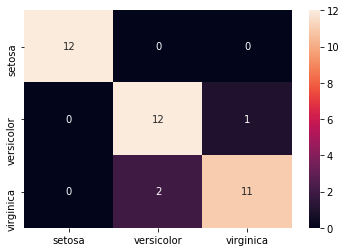

In [12]:
###Craete heatmap
confusion_scores = confusion_matrix(y_test, predictions)
confusion_df = pd.DataFrame(confusion_scores, columns=iris.target_names, index=iris.target_names)
sns.heatmap(confusion_df, annot = True)

In [14]:
###Which features are the most importnant for Randorm Forest
feature_importance = list(zip(iris.feature_names, model.feature_importances_))
feature_importance_df = pd.DataFrame(feature_importance, columns=['Feture', 'RF Importance'])
feature_importance_df

,Feture,RF Importance
0,sepal length (cm),0.115048
1,sepal width (cm),0.024025
2,petal length (cm),0.432769
3,petal width (cm),0.428158


In [20]:
gbrt = GradientBoostingClassifier(random_state=42, n_estimators=100)
model = gbrt.fit(X_train, y_train)

print('Accuracy: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy: 0.95


In [22]:
###Which features are the most importnant for Gradient Boosting
feature_importance_df['GB Importance'] = model.feature_importances_
feature_importance_df

,Feture,RF Importance,GB Importance
0,sepal length (cm),0.115048,0.008803
1,sepal width (cm),0.024025,0.007364
2,petal length (cm),0.432769,0.749724
3,petal width (cm),0.428158,0.234109
